In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [74]:
data = pd.read_csv("csv_files/play_football_dataset.csv")
data.head()

,Day,Weather,Temperature,Humidity,Wind,Play Football
0,1,Sunny,Hot,High,Weak,No
1,2,Sunny,Hot,High,Strong,No
2,3,Cloudy,Hot,High,Weak,Yes
3,4,Rain,Mild,High,Weak,Yes
4,5,Rain,Cold,Normal,Weak,Yes


### Splitting X and Y

In [75]:
x = data.drop(columns=['Play Football', 'Day'], axis=1)
x.head()

,Weather,Temperature,Humidity,Wind
0,Sunny,Hot,High,Weak
1,Sunny,Hot,High,Strong
2,Cloudy,Hot,High,Weak
3,Rain,Mild,High,Weak
4,Rain,Cold,Normal,Weak


In [76]:
y = data[['Play Football']]
y.head()

,Play Football
0,No
1,No
2,Yes
3,Yes
4,Yes


### Encoding

In [77]:
label_encoder = LabelEncoder()
x = x.apply(label_encoder.fit_transform)
x.head()

,Weather,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1


### Splitting Train Test

### Decision Tree

In [78]:
model = DecisionTreeClassifier()
model.fit(x, y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [85]:
model.predict([[2,0,0,1]])   # Sunny = 2, Cold = 0, High = 0, Weak = 1

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

[Text(0.4444444444444444, 0.9, 'Weather <= 0.5\ngini = 0.459\nsamples = 14\nvalue = [5, 9]'),
 Text(0.3333333333333333, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.38888888888888884, 0.8, 'True  '),
 Text(0.5555555555555556, 0.7, 'Humidity <= 0.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.5, 0.8, '  False'),
 Text(0.3333333333333333, 0.5, 'Weather <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.3, 'Wind  <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.3, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'Wind  <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.6666666666666666, 0.3, 'Temperature <= 1.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 

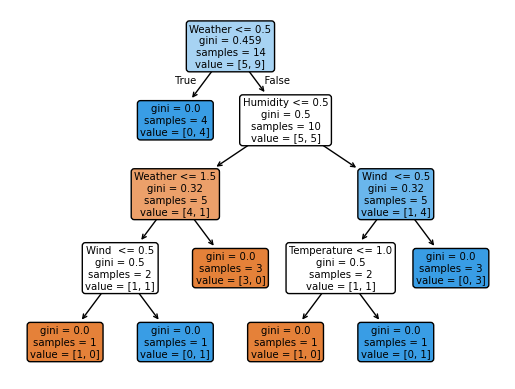

In [79]:
from sklearn import tree

tree.plot_tree(model, rounded=True, filled=True, feature_names=x.columns)